In [1]:
#importing the necessary libraries

import csv
import json
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
# using GADM to get shapefiles

ind_boundaries = gpd.read_file('gadm40_IND_3.shp')
print('Total no. of states and UTs: ', ind_boundaries['NAME_1'].nunique())
print('Names of states and UTs are: ', ind_boundaries['NAME_1'].unique())

Total no. of states and UTs:  36
Names of states and UTs are:  ['Andaman and Nicobar' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Daman and Diu' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu and Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'NCT of Delhi' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand'
 'West Bengal']


Number of administrative boundaries/districts in Telangana :  72
Name of administrative boundaries/districts in Telangana :  1954        Adilabad
1955        Asifabad
1956           Boath
1957         Chinnur
1958        Khanapur
            ...     
2021         Jangaon
2022           Mulug
2023    n.a. ( 1711)
2024       Narsampet
2025          Parkal
Name: NAME_3, Length: 72, dtype: object


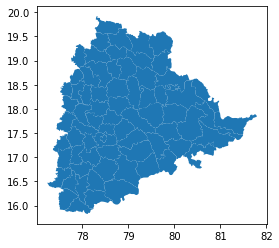

In [3]:
# telangana boundary

ind_boundaries[ind_boundaries['NAME_1']=='Telangana'].plot()
telangana_boundaries = ind_boundaries.loc[ind_boundaries['NAME_1']=='Telangana']
print('Number of administrative boundaries/districts in Telangana : ', len(telangana_boundaries))
print('Name of administrative boundaries/districts in Telangana : ', telangana_boundaries['NAME_3'])

In [4]:
telangana_boundaries.head()

,ID_0,COUNTRY,NAME_1,NL_NAME_1,NAME_2,NL_NAME_2,ID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
1954,IND,India,Telangana,None,Adilabad,None,IND.32.1.1_1,Adilabad,None,None,Taluk,Taluk,None,None,"POLYGON ((78.84434 19.75900, 78.84563 19.75835..."
1955,IND,India,Telangana,None,Adilabad,None,IND.32.1.2_1,Asifabad,None,None,Taluk,Taluk,None,None,"POLYGON ((78.96471 19.57028, 78.95446 19.56272..."
1956,IND,India,Telangana,None,Adilabad,None,IND.32.1.3_1,Boath,None,None,Taluk,Taluk,None,None,"POLYGON ((78.19715 19.33173, 78.18712 19.33861..."
1957,IND,India,Telangana,None,Adilabad,None,IND.32.1.4_1,Chinnur,None,None,Taluk,Taluk,None,None,"POLYGON ((79.92231 19.15713, 79.90597 19.14179..."
1958,IND,India,Telangana,None,Adilabad,None,IND.32.1.5_1,Khanapur,None,None,Taluk,Taluk,None,None,"POLYGON ((78.51988 19.22164, 78.52913 19.23259..."


In [5]:
# extracting relevant fields required for the task

telangana_areas = telangana_boundaries[["NAME_3", "geometry"]]
telangana_areas.head()

,NAME_3,geometry
1954,Adilabad,"POLYGON ((78.84434 19.75900, 78.84563 19.75835..."
1955,Asifabad,"POLYGON ((78.96471 19.57028, 78.95446 19.56272..."
1956,Boath,"POLYGON ((78.19715 19.33173, 78.18712 19.33861..."
1957,Chinnur,"POLYGON ((79.92231 19.15713, 79.90597 19.14179..."
1958,Khanapur,"POLYGON ((78.51988 19.22164, 78.52913 19.23259..."


In [6]:
# renamning so as to match with the output as desired

telangana_adm_name = telangana_areas.rename(columns = {"NAME_3" : "adm_name"})

In [7]:
# importing data and reading it

data = pd.read_csv('telangana_fires.csv')
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,18.3777,80.5314,318.6,1.0,1.0,2015-01-02,802,Aqua,MODIS,69,6.03,302.6,7.7,D,0
1,17.5898,80.9893,315.4,1.2,1.1,2015-01-04,750,Aqua,MODIS,59,6.03,299.5,8.8,D,0
2,17.6028,81.1612,311.8,1.2,1.1,2015-01-05,527,Terra,MODIS,46,6.03,299.8,6.0,D,0
3,17.5241,80.3135,317.0,1.1,1.0,2015-01-05,527,Terra,MODIS,69,6.03,302.0,9.3,D,0
4,17.7571,80.3404,317.2,2.5,1.5,2015-01-05,833,Aqua,MODIS,53,6.03,300.0,29.3,D,0


In [8]:
#converting dates into years

data['year'] = pd.DatetimeIndex(data['acq_date']).year
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year
0,18.3777,80.5314,318.6,1.0,1.0,2015-01-02,802,Aqua,MODIS,69,6.03,302.6,7.7,D,0,2015
1,17.5898,80.9893,315.4,1.2,1.1,2015-01-04,750,Aqua,MODIS,59,6.03,299.5,8.8,D,0,2015
2,17.6028,81.1612,311.8,1.2,1.1,2015-01-05,527,Terra,MODIS,46,6.03,299.8,6.0,D,0,2015
3,17.5241,80.3135,317.0,1.1,1.0,2015-01-05,527,Terra,MODIS,69,6.03,302.0,9.3,D,0,2015
4,17.7571,80.3404,317.2,2.5,1.5,2015-01-05,833,Aqua,MODIS,53,6.03,300.0,29.3,D,0,2015


<AxesSubplot:xlabel='year', ylabel='Count'>

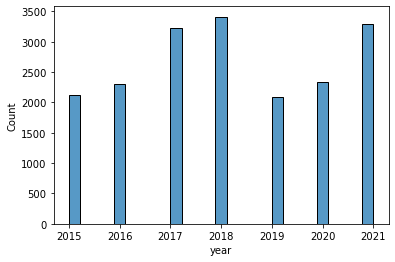

In [9]:
#plotting histogram for fires per year

sns.histplot(data = data, x = 'year')

In [10]:
# Using geopandas to get coordinates from the longitude and latitude values available in data provided

data["geometry"] = gpd.points_from_xy(data["longitude"], data["latitude"])     
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year,geometry
0,18.3777,80.5314,318.6,1.0,1.0,2015-01-02,802,Aqua,MODIS,69,6.03,302.6,7.7,D,0,2015,POINT (80.53140 18.37770)
1,17.5898,80.9893,315.4,1.2,1.1,2015-01-04,750,Aqua,MODIS,59,6.03,299.5,8.8,D,0,2015,POINT (80.98930 17.58980)
2,17.6028,81.1612,311.8,1.2,1.1,2015-01-05,527,Terra,MODIS,46,6.03,299.8,6.0,D,0,2015,POINT (81.16120 17.60280)
3,17.5241,80.3135,317.0,1.1,1.0,2015-01-05,527,Terra,MODIS,69,6.03,302.0,9.3,D,0,2015,POINT (80.31350 17.52410)
4,17.7571,80.3404,317.2,2.5,1.5,2015-01-05,833,Aqua,MODIS,53,6.03,300.0,29.3,D,0,2015,POINT (80.34040 17.75710)


In [11]:
# Extracting features required for this task

loc_year = gpd.GeoDataFrame(data[["year", "geometry"]])

In [12]:
loc_year.head()

,year,geometry
0,2015,POINT (80.53140 18.37770)
1,2015,POINT (80.98930 17.58980)
2,2015,POINT (81.16120 17.60280)
3,2015,POINT (80.31350 17.52410)
4,2015,POINT (80.34040 17.75710)


In [13]:
#using spatial join to merge the year, geometry and adm_name

final_data = gpd.sjoin(loc_year, telangana_adm_name)

C:\Users\91754\AppData\Local\Temp\ipykernel_14180\2185577787.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  final_data = gpd.sjoin(loc_year, telangana_adm_name)


In [14]:
final_data.columns

Index(['year', 'geometry', 'index_right', 'adm_name'], dtype='object')

In [15]:
final_data = final_data[["adm_name", "year", "geometry"]]

In [16]:
final_data.head()

,adm_name,year,geometry
0,Venkatapuram,2015,POINT (80.53140 18.37770)
36,Venkatapuram,2015,POINT (80.40040 18.50930)
39,Venkatapuram,2015,POINT (80.52920 18.38910)
92,Venkatapuram,2015,POINT (80.53480 18.33290)
178,Venkatapuram,2015,POINT (80.71680 18.30900)


In [17]:
final_data = final_data.groupby(["adm_name", "year"], as_index = False).size()
final_data.head(3)

,adm_name,year,size
0,Achampet,2015,138
1,Achampet,2016,84
2,Achampet,2017,32


In [18]:
final_data = final_data.rename(columns = {"size" : "fireCount"})

<AxesSubplot:xlabel='adm_name', ylabel='fireCount'>

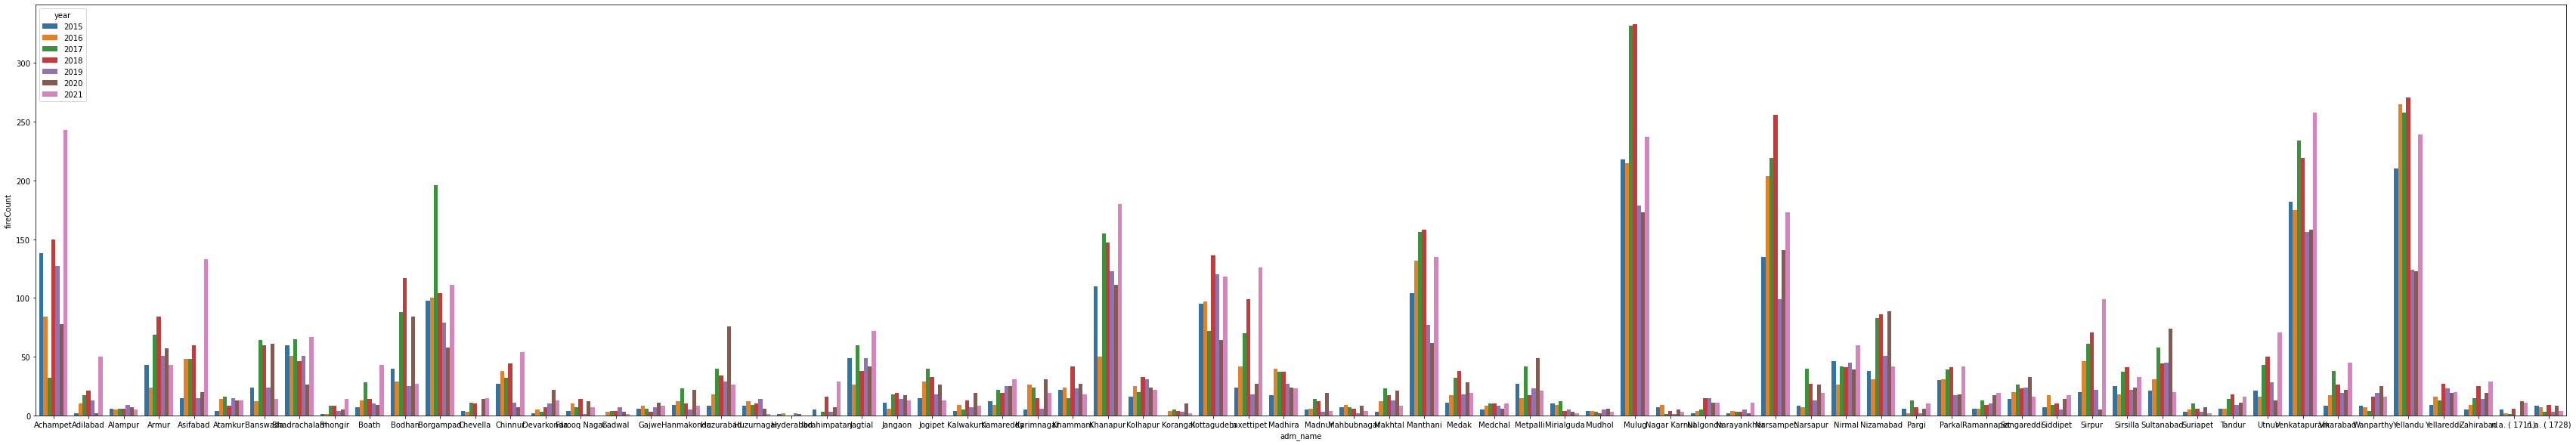

In [19]:
plt.figure(figsize = (60,10))
sns.barplot(data = final_data, x = "adm_name" , y = "fireCount" , hue = "year")     

In [20]:
final_data.sort_values(by ="fireCount", ascending = False)

,adm_name,year,fireCount
311,Mulug,2018,333
310,Mulug,2017,332
465,Yellandu,2018,271
463,Yellandu,2016,265
464,Yellandu,2017,258
...,...,...,...
148,Hyderabad,2020,1
144,Huzurnagar,2021,1
116,Gadwal,2021,1
108,Farooq Nagar,2019,1


In [21]:
# writing data to json

final_data.to_json(r'output1.json', orient = 'split')